# Project 1: Investigating Gun and Census Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction:

### The dataset I have chosen for this analysis is the NCIS firearm background check data and census data.  This project has relied on multiple learning resources.  The primary resource was the video course series from Udacity, several introductory resources put together by WGU for pandas, anaconda, markup, and juypter notebooks.  I supplemented these resources with a few stack overflow, geeksforgeeks.org, and pandas.pydata.org queries.  

### I have chosen several questions to investigate to see if there is a relationship supported by the data:  
<ul>
<li> What states have the largest gun registration growth between 2013 and 2017?</li>
<li> Do gun registrations increase during election years?</li>
<li> Does ethnic diversity impact gun regristrations? </li>
</ul>

In [1]:
import pandas as pd
import numpy as np


<a id='wrangling'></a>
## Data Wrangling


### General Properties

#### First, all the data is read in via pd

In [2]:
census = pd.read_csv('C:\\Users\\chris\\Desktop\\Udacity files\\Project 1//U.S. Census Data.csv')

In [3]:
gun = pd.read_excel('C:\\Users\\chris\\Desktop\\Udacity files\\Project 1//gun_data.xlsx')

#### Next, we want to describe the data to see what we imported:

In [4]:
census.describe()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
count,80,28,65,65,65,65,65,65,65,65,...,65,65,65,65,65,65,65,65,65,65
unique,80,15,65,64,64,64,63,64,63,64,...,65,64,64,64,63,65,65,64,65,64
top,Median selected monthly owner costs -without a...,(c),"67,370,353",7.30%,50.30%,50.90%,6.80%,3.30%,0.10%,51.60%,...,383838,0.048,50.40%,2.50%,1.90%,"76,434","44,077",1.50%,"370,755",7.10%
freq,1,6,1,2,2,2,2,2,2,2,...,1,2,2,2,2,1,1,2,1,2


#### Fact and Fact Note look like columns that may not be like the rest of the data. 

#### Display the header to see more about this data.

In [5]:

census.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


#### Fact and Fact Note are descriptive columns for the entries in the different states.  They will be important to clean the data later.  

#### Repeat the same process on the gun data to see if there are any first impressions.  

In [6]:
gun.describe()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
count,12461.000000,1100.000000,12465.000000,12466.000000,5500.000000,12485.000000,12462.000000,10542.000000,10540.000000,5115.000000,...,1815.000000,990.000000,825.000000,2750.000000,2750.000000,2750.000000,2475.000000,2750.000000,2255.000000,12485.000000
mean,6413.629404,1165.956364,5940.881107,7810.847585,360.471636,268.603364,58.898090,4.828021,7.834156,0.165591,...,1.027548,0.076768,0.087273,14.936000,11.602909,1.030182,0.402020,0.441818,0.105987,21595.725911
std,23752.338269,9224.200609,8618.584060,9309.846140,1349.478273,783.185073,604.814818,10.907756,16.468028,1.057105,...,4.386296,0.634503,0.671649,71.216021,54.253090,4.467843,1.446568,1.528223,0.427363,32591.418387
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,865.000000,2078.250000,17.000000,15.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4638.000000
50%,518.000000,0.000000,3059.000000,5122.000000,121.000000,125.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12399.000000
75%,4272.000000,0.000000,7280.000000,10380.750000,354.000000,301.000000,0.000000,5.000000,8.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,25453.000000
max,522188.000000,116681.000000,107224.000000,108058.000000,77929.000000,38907.000000,28083.000000,164.000000,269.000000,49.000000,...,64.000000,12.000000,12.000000,1017.000000,777.000000,71.000000,28.000000,17.000000,4.000000,541978.000000


#### There is a lot of missing data here.  Only 7 of 19 columns have 10K/12.4K or more records, those are the columns that the analysis will want to focus on.     

#### Then display header:

In [7]:
gun.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506



### Data Cleaning 

#### Let's start by cleaning the gun data, as there were only a few columns there that we want to focus on.  We will take only the first 9 columns of data, then drop the permit_recheck and other columns, then view our new header.    

In [8]:
gun = gun.iloc[:,0:9]

In [9]:
gun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   month           12485 non-null  object 
 1   state           12485 non-null  object 
 2   permit          12461 non-null  float64
 3   permit_recheck  1100 non-null   float64
 4   handgun         12465 non-null  float64
 5   long_gun        12466 non-null  float64
 6   other           5500 non-null   float64
 7   multiple        12485 non-null  int64  
 8   admin           12462 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 878.0+ KB


In [10]:
gun = gun.drop(columns=['permit_recheck','other'])

In [11]:
gun.head()

,month,state,permit,handgun,long_gun,multiple,admin
0,2017-09,Alabama,16717.0,5734.0,6320.0,317,0.0
1,2017-09,Alaska,209.0,2320.0,2930.0,160,0.0
2,2017-09,Arizona,5069.0,11063.0,7946.0,631,0.0
3,2017-09,Arkansas,2935.0,4347.0,6063.0,366,51.0
4,2017-09,California,57839.0,37165.0,24581.0,0,0.0


#### Now to take a closer look at what type of data is in the specific fields.  

In [12]:
gun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   month     12485 non-null  object 
 1   state     12485 non-null  object 
 2   permit    12461 non-null  float64
 3   handgun   12465 non-null  float64
 4   long_gun  12466 non-null  float64
 5   multiple  12485 non-null  int64  
 6   admin     12462 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 682.9+ KB


In [13]:
type(gun['month'][1])

str

#### Now print the cell to see the format of the string

In [14]:
print(gun['month'][1])

2017-09


In [15]:
type(gun['state'][1])

str

#### Here we can see that month and state are strings within objects, we will need to change our date formart.  Mostly all our other numerical data are floats.  First we need to fill in the missing values with '0', then we can change the floats to ints, as applications should be whole numbers.   

In [16]:
gun = gun.fillna('0')

In [17]:
col = ['permit','handgun','long_gun','admin']

In [18]:
gun.isnull().sum().sum()

0

In [19]:
gun[col] = gun[col].applymap(np.int64)

In [20]:
gun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   month     12485 non-null  object
 1   state     12485 non-null  object
 2   permit    12485 non-null  int64 
 3   handgun   12485 non-null  int64 
 4   long_gun  12485 non-null  int64 
 5   multiple  12485 non-null  int64 
 6   admin     12485 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 682.9+ KB


#### Now we have 12485 values in each column, our first two columns are still objects containing strings, with the rest of our data as ints. 

#### Next I want to take the year data from our month column, split that to its own column, then replace our currernt date column 'month' and replace that with only the month from that column.  

In [21]:
gun['year']=gun['month'].apply(lambda x: x.split("-")[0]).astype(int)
gun['year'].unique()

array([2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007,
       2006, 2005, 2004, 2003, 2002, 2001, 2000, 1999, 1998])

In [22]:
gun['month'] = gun['month'].apply(lambda x: x.split("-")[1]).astype(int)
gun['month'].unique()

array([ 9,  8,  7,  6,  5,  4,  3,  2,  1, 12, 11, 10])

In [23]:
gun.head()

,month,state,permit,handgun,long_gun,multiple,admin,year
0,9,Alabama,16717,5734,6320,317,0,2017
1,9,Alaska,209,2320,2930,160,0,2017
2,9,Arizona,5069,11063,7946,631,0,2017
3,9,Arkansas,2935,4347,6063,366,51,2017
4,9,California,57839,37165,24581,0,0,2017


In [24]:
gun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   month     12485 non-null  int32 
 1   state     12485 non-null  object
 2   permit    12485 non-null  int64 
 3   handgun   12485 non-null  int64 
 4   long_gun  12485 non-null  int64 
 5   multiple  12485 non-null  int64 
 6   admin     12485 non-null  int64 
 7   year      12485 non-null  int32 
dtypes: int32(2), int64(5), object(1)
memory usage: 682.9+ KB


#### Now that the gun data is in a more usable format, we can proceed to our census data.  

#### FIrst I want to trim this data down to what I need to answer the questions I want to ask, so I want to bring back the overall census number for 2010, the estimate for 2016, and the racial makeup of the states from 2016.  

In [25]:
census = census.iloc[[0,3,13,14,15,16,17,18,19]]

#### Next drop the fact note column

In [26]:
census = census.drop('Fact Note', axis =1)

In [27]:
census = census.drop('Fact', axis =1)

In [28]:
census.head()

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065","20,612,439","10,310,371",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
3,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934","18,801,310","9,687,653",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
13,26.80%,3.80%,4.90%,15.70%,6.50%,4.50%,11.80%,22.60%,16.80%,32.00%,...,0.02,0.171,12.60%,1.40%,1.30%,19.80%,4.10%,3.60%,6.60%,1.30%
14,0.70%,15.20%,5.40%,1.00%,1.70%,1.60%,0.50%,0.60%,0.50%,0.50%,...,0.09,0.004,1.00%,1.60%,0.40%,0.50%,1.90%,0.20%,1.10%,2.70%
15,1.40%,6.30%,3.40%,1.60%,14.80%,3.30%,4.70%,4.00%,2.90%,4.10%,...,0.015,0.018,4.80%,2.50%,1.80%,6.60%,8.60%,0.80%,2.80%,1.00%


#### Next I want to modify this data so the states are in the first column rather than the first row.  

In [29]:
census = census.transpose()

In [30]:
census.head()

,0,3,13,14,15,16,17,18,19
Alabama,"4,863,300","4,779,736",26.80%,0.70%,1.40%,0.10%,1.60%,4.20%,65.80%
Alaska,"741,894","710,231",3.80%,15.20%,6.30%,1.30%,7.30%,7.00%,61.20%
Arizona,"6,931,071","6,392,017",4.90%,5.40%,3.40%,0.30%,2.80%,30.90%,55.50%
Arkansas,"2,988,248","2,915,918",15.70%,1.00%,1.60%,0.30%,2.00%,7.30%,72.90%
California,"39,250,017","37,253,956",6.50%,1.70%,14.80%,0.50%,3.80%,38.90%,37.70%


#### Then I want to modify the column names, and remove the current column descriptor. 

In [31]:
census = census.iloc[0:]

In [32]:
census.columns = ['Pop. Est 2016','Pop. Census 2010','% Black','% Native Americans','% Asian','% Hawaiian','% Two or more','% Latino','% White']

In [33]:
census.head()

,Pop. Est 2016,Pop. Census 2010,% Black,% Native Americans,% Asian,% Hawaiian,% Two or more,% Latino,% White
Alabama,"4,863,300","4,779,736",26.80%,0.70%,1.40%,0.10%,1.60%,4.20%,65.80%
Alaska,"741,894","710,231",3.80%,15.20%,6.30%,1.30%,7.30%,7.00%,61.20%
Arizona,"6,931,071","6,392,017",4.90%,5.40%,3.40%,0.30%,2.80%,30.90%,55.50%
Arkansas,"2,988,248","2,915,918",15.70%,1.00%,1.60%,0.30%,2.00%,7.30%,72.90%
California,"39,250,017","37,253,956",6.50%,1.70%,14.80%,0.50%,3.80%,38.90%,37.70%


#### Now we can look to see what format our data is in, and if there are any modifications needed now. 

In [34]:
census.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Pop. Est 2016       50 non-null     object
 1   Pop. Census 2010    50 non-null     object
 2   % Black             50 non-null     object
 3   % Native Americans  50 non-null     object
 4   % Asian             50 non-null     object
 5   % Hawaiian          50 non-null     object
 6   % Two or more       50 non-null     object
 7   % Latino            50 non-null     object
 8   % White             50 non-null     object
dtypes: object(9)
memory usage: 3.9+ KB


In [35]:
print(census['Pop. Est 2016'][1])

741,894


In [36]:
print(census['% Latino'][8])

24.90%


#### There are commas, and % signs in our data that need to be removed. 

In [37]:
census = census.replace({',':''}, regex=True)
census = census.replace({'%':''}, regex=True)

#### Now we can change our population columns to ints as people are measured in whole numbers in this instance. 

In [38]:
census['Pop. Est 2016'] = census['Pop. Est 2016'].astype(int)

In [39]:
census['Pop. Census 2010'] = census['Pop. Census 2010'].astype(int)

#### Now to take a look at the data in our other objects. It looks like a float, but is in string form.  

In [40]:
print(census['% Asian'][1])

6.30


In [41]:
type(census['% Asian'][1])

str

#### Now to transform the remaining colums to ints, ensuring any non int values are dealt with.  

In [42]:
cols = census.columns[census.dtypes.eq('object')]

In [43]:
census[cols] = census[cols].apply(pd.to_numeric, errors='coerce')

In [44]:
census.index

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object')

In [45]:
census.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Pop. Est 2016       50 non-null     int32  
 1   Pop. Census 2010    50 non-null     int32  
 2   % Black             50 non-null     float64
 3   % Native Americans  50 non-null     float64
 4   % Asian             50 non-null     float64
 5   % Hawaiian          46 non-null     float64
 6   % Two or more       50 non-null     float64
 7   % Latino            50 non-null     float64
 8   % White             50 non-null     float64
dtypes: float64(7), int32(2)
memory usage: 6.0+ KB


In [46]:
census.head()

,Pop. Est 2016,Pop. Census 2010,% Black,% Native Americans,% Asian,% Hawaiian,% Two or more,% Latino,% White
Alabama,4863300,4779736,26.8,0.7,1.4,0.1,1.6,4.2,65.8
Alaska,741894,710231,3.8,15.2,6.3,1.3,7.3,7.0,61.2
Arizona,6931071,6392017,4.9,5.4,3.4,0.3,2.8,30.9,55.5
Arkansas,2988248,2915918,15.7,1.0,1.6,0.3,2.0,7.3,72.9
California,39250017,37253956,6.5,1.7,14.8,0.5,3.8,38.9,37.7


#### Now this looks good as well, we can dive into the analysis.  

<a id='eda'></a>
## Exploratory Data Analysis

### What states have the largest increase in gun registrations between 2013 and 2017?

###### The first step here is to filter out the data that I need and create a new dataframe. 

In [47]:
newgun = gun.filter(['state','permit','month','year'])

#### Now I want to group the data by state and year to be able to pull out what I'll need to do my compare.  

In [48]:
newgroup=newgun.groupby(['state','year'])['permit'].sum().reset_index().copy()

In [49]:
print(newgroup)

        state  year  permit
0     Alabama  1998       0
1     Alabama  1999       0
2     Alabama  2000      12
3     Alabama  2001       0
4     Alabama  2002       0
...       ...   ...     ...
1095  Wyoming  2013    7001
1096  Wyoming  2014    7046
1097  Wyoming  2015    6674
1098  Wyoming  2016    7938
1099  Wyoming  2017    3447

[1100 rows x 3 columns]


#### Now take out only 2013 and 2017 data.  

In [50]:
gun2013 = newgroup[newgroup['year'] == 2013].reset_index()

In [51]:
gun2013 = gun2013.drop('index', axis =1)
gun2013.head()

,state,year,permit
0,Alabama,2013,100231
1,Alaska,2013,2569
2,Arizona,2013,76048
3,Arkansas,2013,66434
4,California,2013,423953


In [52]:
gun2017 = newgroup[newgroup['year'] == 2017].reset_index()

In [53]:
gun2017 = gun2017.drop('index', axis =1)
gun2017.head()

,state,year,permit
0,Alabama,2017,187155
1,Alaska,2017,2140
2,Arizona,2017,63537
3,Arkansas,2017,29647
4,California,2017,531810


#### Take the difference between 2013 and 2017, then display as ints.  

In [54]:
gundif = (gun2017['permit'] - gun2013['permit']) 

In [55]:
gundif.astype(int)

0       86924
1        -429
2      -12511
3      -36787
4      107857
5      -40315
6     -100814
7        3176
8         156
9       10582
10     -27319
11          0
12      -8219
13      14999
14    -721306
15     122066
16     -34954
17     -12524
18    1960621
19      23536
20       6494
21          0
22      18934
23     -70119
24     -26425
25     115825
26       7525
27     -54882
28      -2931
29     -23725
30      -4975
31     -23708
32          0
33      -1608
34      -2189
35     -73658
36      -3197
37     109493
38          0
39      24808
40     -41866
41          0
42          0
43      20802
44      11329
45      82184
46     -48153
47     -85855
48          0
49       -218
50       9107
51     -33102
52      13477
53      45461
54      -3554
Name: permit, dtype: int32

#### Then find the 5 largest gainers during this time. 

In [56]:
gundif.nlargest(n=5)

18    1960621
15     122066
25     115825
37     109493
4      107857
Name: permit, dtype: int64

#### Tie state name to difference using index, then answer first question.  

In [57]:
print("States with largest gain in gun registrations:")
print("State\\","# increase");
print(gun2013['state'][18],gundif[18]);
print(gun2013['state'][15],gundif[15]);
print(gun2013['state'][25],gundif[25]);
print(gun2013['state'][37],gundif[37]);
print(gun2013['state'][4],gundif[4]);

States with largest gain in gun registrations:
State\ # increase
Kentucky 1960621
Indiana 122066
Minnesota 115825
Ohio 109493
California 107857


#### Kentucky has seen the greatest increase in registrations during our timeframe, with Indiana, Minnesota, Ohio, and California rounding out the top five.  

### Do gun registrations increase during election years?

#### For this question, I can use my prior newgun dataset.  

In [58]:
newgungroup = newgun.groupby(['year'])['permit'].sum().reset_index().copy()

In [59]:
newgungroup = newgungroup.astype(int)

In [60]:
newgungroup['year'] = pd.to_datetime(newgungroup["year"].astype(str), format="%Y")

In [61]:
print(newgungroup)

         year    permit
0  1998-01-01     78169
1  1999-01-01   1037700
2  2000-01-01   1227814
3  2001-01-01   1408338
4  2002-01-01   1363211
5  2003-01-01   1403496
6  2004-01-01   1345672
7  2005-01-01   1350193
8  2006-01-01   2037453
9  2007-01-01   3078802
10 2008-01-01   3699021
11 2009-01-01   4450822
12 2010-01-01   4884307
13 2011-01-01   5545457
14 2012-01-01   5683547
15 2013-01-01   6169832
16 2014-01-01   7769858
17 2015-01-01   8782048
18 2016-01-01  11134651
19 2017-01-01   7469845


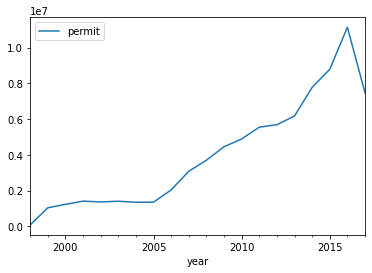

In [62]:
newgungroup.plot(x = 'year', y = 'permit')

#### We can see with this graph that there isn't a strong relationship between the different election years and the number of gun registrations. The best conclusion we can make from this data is that gun registrations appear to be trending higher across time.   

### Does ethnic diversity impact gun regristrations?

#### First off, I want to create a new list that contains the state and value for the top five states for each racial category.  

In [63]:
top5 = []
listcols = ['% Black','% Native Americans','% Asian','% Hawaiian','% Two or more','% Latino','% White']

for column in listcols:
    newframe = census[[column]].copy()
    top5.append(newframe.nlargest(5,column))

#### Now lets see what states have the most of each race, we will compare this to our registration data later.  

In [64]:
top5

[             % Black
 Mississippi     37.7
 Louisiana       32.6
 Georgia         32.0
 Maryland        30.7
 Alabama         26.8,
             % Native Americans
 Alaska                    15.2
 Montana                    6.6
 Arizona                    5.4
 Wyoming                    2.7
 Washington                 1.9,
             % Asian
 Hawaii         37.7
 California     14.8
 New Jersey      9.8
 Nevada          8.7
 Washington      8.6,
             % Hawaiian
 Hawaii            10.2
 Alaska             1.3
 Utah               1.0
 Nevada             0.8
 Washington         0.8,
             % Two or more
 Hawaii               23.7
 Alaska                7.3
 Washington            4.6
 Nevada                4.2
 California            3.8,
             % Latino
 Texas           39.1
 California      38.9
 Arizona         30.9
 Nevada          28.5
 Florida         24.9,
                % White
 Maine             93.5
 Vermont           93.1
 West Virginia     92.3
 New Hamps

#### Now I'll create a new group made up of the sum of all permits by state, then order that data by number of permits.    

In [65]:
gungroup = newgun.groupby(['state'])['permit'].sum().reset_index().copy()

In [66]:
gungroup.sort_values('permit')

,state,permit
41,Puerto Rico,0
32,New Jersey,0
21,Mariana Islands,0
48,Vermont,0
42,Rhode Island,0
11,Guam,0
38,Oklahoma,9
8,District of Columbia,330
49,Virgin Islands,11485
1,Alaska,13352


#### This shows us that there are some states that have not had any data reported, while others have plenty of datapoints.  This leads me to believe that this data may not be the most reliable source due to differing state reporting requirements. 
#### To our question at hand, we need to look at the states with the largest % of the total to see if there are trends we can draw from their racial makeup.   

In [67]:
gungroup['permit'].sum()

79920236

In [68]:
gunpercent = gungroup['permit'] / 79920236

#### Change our data to float, then take the top five.  

In [69]:
gunpercent.astype(float)

0     1.310608e-02
1     1.670666e-04
2     8.890227e-03
3     6.355724e-03
4     8.171326e-02
5     5.342452e-03
6     1.996078e-02
7     2.842834e-04
8     4.129117e-06
9     1.362361e-02
10    2.235614e-02
11    0.000000e+00
12    2.468974e-03
13    4.619856e-03
14    1.188515e-01
15    3.710900e-02
16    1.836799e-02
17    1.945327e-03
18    3.118957e-01
19    1.055753e-03
20    2.159653e-04
21    0.000000e+00
22    4.327302e-03
23    1.708234e-02
24    4.145478e-02
25    3.070107e-02
26    1.250559e-03
27    5.746242e-03
28    1.816036e-03
29    6.971851e-03
30    2.664181e-03
31    5.121707e-03
32    0.000000e+00
33    1.166676e-03
34    1.006596e-02
35    4.846049e-02
36    1.307879e-03
37    4.658157e-03
38    1.126123e-07
39    4.616978e-04
40    1.871876e-02
41    0.000000e+00
42    0.000000e+00
43    1.170316e-02
44    4.584196e-04
45    1.414495e-02
46    3.575542e-02
47    3.445258e-02
48    0.000000e+00
49    1.437058e-04
50    3.214205e-04
51    2.087280e-02
52    1.2389

In [70]:
gunpercent.nlargest(n=5)

18    0.311896
14    0.118851
4     0.081713
35    0.048460
24    0.041455
Name: permit, dtype: float64

#### Tie the state from our prior gun data index to the rounded percentage from the gunpercent data. 

In [71]:
print("States with largest % of gun registrations:")
print("State\\","% of registrations");
print(gun2013['state'][18],gunpercent[18].round(2));
print(gun2013['state'][14],gunpercent[14].round(2));
print(gun2013['state'][4],gunpercent[4].round(2));
print(gun2013['state'][35],gunpercent[35].round(2));
print(gun2013['state'][24],gunpercent[24].round(2));

States with largest % of gun registrations:
State\ % of registrations
Kentucky 0.31
Illinois 0.12
California 0.08
North Carolina 0.05
Michigan 0.04


#### Now I want to take a copy of the census data, transposed, with the population rows removed so I can graph the racial makeup of the states with the most registrations. 

In [72]:
tcensus = census.transpose().copy()
tcensus = tcensus.iloc[2:]
states = ['Kentucky','Illinois','California','North Carolina','Michigan']

AxesSubplot(0.32375,0.125;0.3775x0.755)
AxesSubplot(0.32375,0.125;0.3775x0.755)
AxesSubplot(0.32375,0.125;0.3775x0.755)
AxesSubplot(0.32375,0.125;0.3775x0.755)
AxesSubplot(0.32375,0.125;0.3775x0.755)


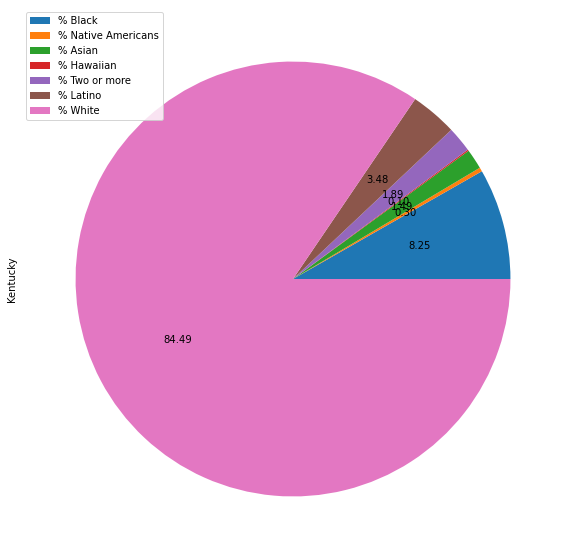

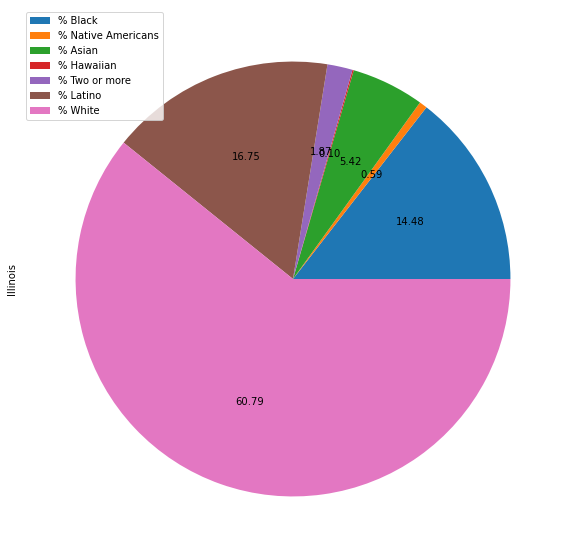

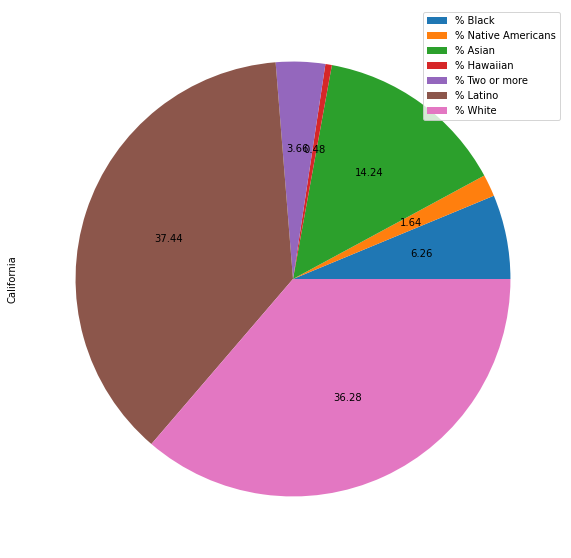

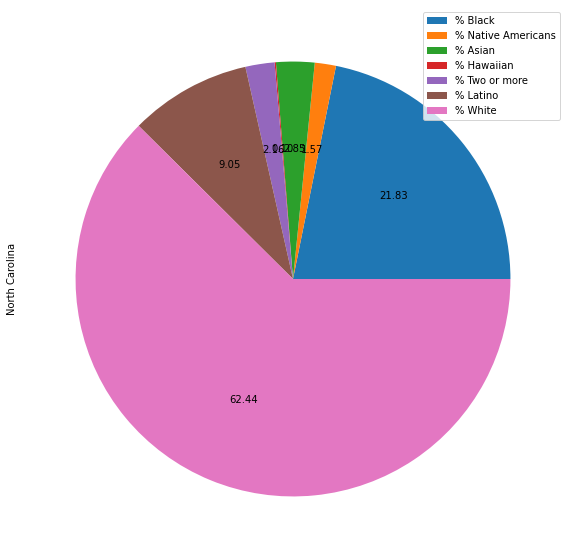

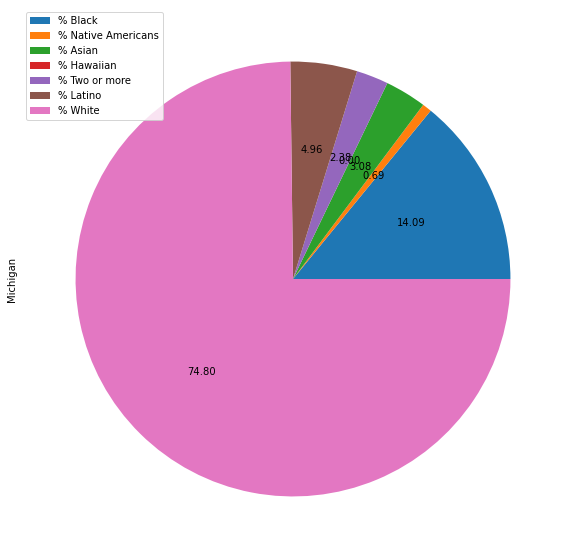

In [73]:
for col in states:
    print(tcensus.plot.pie(y = col, legend =True, labeldistance=None, figsize=(20,10), autopct='%.2f', fontsize=10));
    

#### The racial makeup of these states varies greatly, there doesn't appear to be any correlation, but lets take a closer look at the numbers.  

In [74]:
for col in states:
    print(tcensus[col])

% Black                8.3
% Native Americans     0.3
% Asian                1.5
% Hawaiian             0.1
% Two or more          1.9
% Latino               3.5
% White               85.0
Name: Kentucky, dtype: float64
% Black               14.7
% Native Americans     0.6
% Asian                5.5
% Hawaiian             0.1
% Two or more          1.9
% Latino              17.0
% White               61.7
Name: Illinois, dtype: float64
% Black                6.5
% Native Americans     1.7
% Asian               14.8
% Hawaiian             0.5
% Two or more          3.8
% Latino              38.9
% White               37.7
Name: California, dtype: float64
% Black               0.222
% Native Americans    0.016
% Asian               0.029
% Hawaiian            0.001
% Two or more         0.022
% Latino              0.092
% White               0.635
Name: North Carolina, dtype: float64
% Black               14.2
% Native Americans     0.7
% Asian                3.1
% Hawaiian             N

#### This still looks pretty varied and like there aren't any meaningful connections that can be drawn from our data about overall registrations and the racial makeup of the states that had the most registrations across this dataset.  

#### One very interesting note is the breakdown by state and # of permits, the top state (Kentucky) comprises nearly 1/3 of the total permit registrations, while the top three (Kentucky, Illinois, California) accounted for nearly half of all permit registrations.   

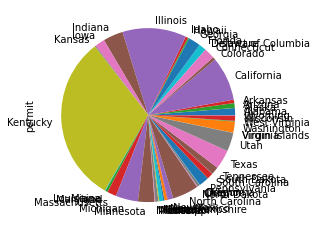

In [75]:
gunpercent.plot.pie(x = 'permit', labels = gun2013['state']);

<a id='conclusions'></a>
## Conclusions

#### In this phase of the project, I am reflecting on the conclusions I have drawn from the data, what it is that cannot be determined without further exploration, and why.  

#### I imported the required csv files, cleaned, and manipulated the data into a useable formart, then answered the following questions:

### What states have the largest gun registration growth between 2013 and 2017?

#### Our data indicated Kentucky had the greatest increase in registrations during our timeframe, however, during the analysis process it became apparent that this data is greatly skewed.  Drawing conclusions on individual state trends is not definitive because of this skewed dataset.  

### Do gun registrations increase during election years?

#### For this question, we grouped all of our gun data by year and graphed it to determine if we saw any upticks or downticks during elction years, and we found no correlation between election year and number of gun permit registrations, however, I did observe a different seemingly positive correlation between time and number of registrations.  
#### The skewed data will continue to impact results, but that impact should be minimized by the aggregation across states by year.   

### Does ethnic diversity impact gun regristrations?

#### For this question, I determined which states had the highest proportion of each of the race columns, then compared the percentages of total gun registrations for each state. The states with the highest percentages did not correspond to the states that had higher than average proportions of any particular race. There we no aparent trends between the racial makeups of the states with the highest gun registration percentages.  


### Limitations:
#### The skewed data set was a great limitation, as it doesn't seem likely that 1 state in the country would account for one third of the gun permit registrations, and 3 states account for nearly half.  If the sample is not truly representative of the underlying population, one runs the risk of having a biased analysis .  
#### Another limitation from this data set is the number of columns that had to be disregarded due to null or missing values.  This could be the result of different states having different reporting standards at different times.  This leads to one running the risk of making incorrect predictions based on the incomplete data.  
